In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Getting the Data Ready

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Books Data/Data_Train.xlsx")

In [ ]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [ ]:
len(df)

6237

In [ ]:
df.isna().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [ ]:
df.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

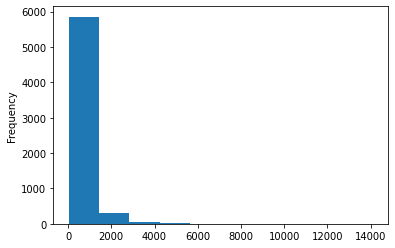

In [ ]:
df.Price.plot.hist()

### Make a copy of original dataframe

In [ ]:
df_tmp = df.copy()

In [ ]:
df_tmp

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00


### Lets convert data in categories

In [ ]:
pd.api.types.is_string_dtype(df_tmp["Title"])

True

In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Title
Author
Edition
Reviews
Ratings
Synopsis
Genre
BookCategory


In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()
    df_tmp[label] = pd.Categorical(content).codes+1

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   int16  
 1   Author        6237 non-null   int16  
 2   Edition       6237 non-null   int16  
 3   Reviews       6237 non-null   int8   
 4   Ratings       6237 non-null   int16  
 5   Synopsis      6237 non-null   int16  
 6   Genre         6237 non-null   int16  
 7   BookCategory  6237 non-null   int8   
 8   Price         6237 non-null   float64
dtypes: float64(1), int16(6), int8(2)
memory usage: 134.1 KB


In [ ]:
df_tmp.Author.value_counts()

63      69
1869    49
698     48
101     34
1295    34
        ..
870      1
2915     1
866      1
2911     1
2049     1
Name: Author, Length: 3679, dtype: int64

### Save Preprocesssed Data

In [ ]:
df_tmp.to_csv("/content/drive/MyDrive/Books Data/Train_tmp.csv", index=False)

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   int16  
 1   Author        6237 non-null   int16  
 2   Edition       6237 non-null   int16  
 3   Reviews       6237 non-null   int8   
 4   Ratings       6237 non-null   int16  
 5   Synopsis      6237 non-null   int16  
 6   Genre         6237 non-null   int16  
 7   BookCategory  6237 non-null   int8   
 8   Price         6237 non-null   float64
dtypes: float64(1), int16(6), int8(2)
memory usage: 134.1 KB


In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   int16  
 1   Author        6237 non-null   int16  
 2   Edition       6237 non-null   int16  
 3   Reviews       6237 non-null   int8   
 4   Ratings       6237 non-null   int16  
 5   Synopsis      6237 non-null   int16  
 6   Genre         6237 non-null   int16  
 7   BookCategory  6237 non-null   int8   
 8   Price         6237 non-null   float64
dtypes: float64(1), int16(6), int8(2)
memory usage: 134.1 KB


## Modelling

In [ ]:
np.random.seed(42)
# Import the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df_tmp.drop("Price", axis=1)
y = df_tmp["Price"]

# Split the data into training and Validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

# Instantiate the model
model = RandomForestRegressor()

# Fit the model
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
df_tmp.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,4764,616,1043,26,301,3761,2,1,220.00
1,1722,308,2763,25,55,587,75,3,202.93
2,2447,3391,1961,34,266,32,194,7,299.00
3,156,63,2616,27,46,561,93,6,180.00
4,2344,954,82,36,1,1823,254,2,965.62


In [ ]:
df_tmp['Title'].dtype

dtype('int16')

In [ ]:
model.score(X_train, y_train)

0.8748722028615713

## Building an Evaluation Function

In [ ]:
# Create a Evaluation Function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
  """ 
  Calculate the root mean squared log error between predictions and true labels.
  """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
  train_preds = model.predict(X_train)
  valid_preds = model.predict(X_valid)
  scores = {"Training MAE" : mean_absolute_error(y_train, train_preds),
            "Valid MAE" : mean_absolute_error(y_valid, valid_preds),
            "Training rmsle" : rmsle(y_train, train_preds),
            "Valid rmsle" : rmsle(y_valid, valid_preds),
            "Training r2_score" : r2_score(y_train, train_preds),
            "Valid r2_score" : r2_score(y_valid, valid_preds)}
  return scores

In [ ]:
show_scores(model)

{'Training MAE': 118.39643576912064,
 'Training r2_score': 0.8748722028615713,
 'Training rmsle': 0.34405761342787805,
 'Valid MAE': 313.9366106469399,
 'Valid r2_score': 0.03489979356081463,
 'Valid rmsle': 0.6957006593261873}

## Import Test data and evaluate the model and check the prediction

In [ ]:
test_df = pd.read_excel("/content/drive/MyDrive/Books Data/Data_Test.xlsx")

In [ ]:
test_df

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"
...,...,...,...,...,...,...,...,...
1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media"
1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts"
1557,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour
1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts"


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 97.6+ KB


In [ ]:
test_df.isna().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

### Create a function that will preprocess the test data as same as training data

In [ ]:
def preprocess_data(df):
  for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
      df[label] = content.astype("category").cat.as_ordered()
      df[label] = pd.Categorical(content).codes+1
  return df

In [ ]:
df_test = preprocess_data(test_df)
df_test

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,1143,1072,228,24,161,128,190,6
1,666,357,1167,30,1,467,164,5
2,185,240,513,30,93,64,186,10
3,1395,46,639,21,9,647,175,5
4,863,934,746,24,155,781,144,8
...,...,...,...,...,...,...,...,...
1555,4,1119,426,30,93,1400,74,5
1556,755,8,1065,16,19,86,49,3
1557,1222,601,1016,20,110,1199,124,7
1558,874,417,666,15,77,611,219,3


In [ ]:
X_train

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
1025,1944,1801,2063,31,301,1934,94,2
2977,4475,1414,2661,32,301,1955,89,5
5001,2515,1875,1491,30,228,2855,134,10
3318,1888,2128,1367,36,1,4281,329,11
4405,1210,2617,1117,31,94,574,83,7
...,...,...,...,...,...,...,...,...
3772,4571,2202,3140,36,107,4095,126,4
5191,3949,1619,1278,29,189,56,342,2
5226,1230,81,2302,36,107,683,219,4
5390,2849,2123,2684,36,238,3063,219,4


In [ ]:
test_preds = model.predict(df_test)

In [ ]:
test_preds

array([ 603.337 , 1410.1978, 1026.5582, ...,  431.435 ,  508.5492,
        872.8319])

## Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions = rf_grid,
                              n_iter = 10,
                              cv=5,
                              verbose = True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.4s finished


CPU times: user 7.93 s, sys: 451 ms, total: 8.38 s
Wall time: 24.2 s


In [ ]:
show_scores(rs_model)

{'Training MAE': 246.17339781310667,
 'Training r2_score': 0.5092934601387642,
 'Training rmsle': 0.6026770193330087,
 'Valid MAE': 311.01326497995746,
 'Valid r2_score': 0.13774274537662257,
 'Valid rmsle': 0.6966609412221154}

In [ ]:
%%time
ideal_model = RandomForestRegressor(n_estimators=20,
                                   min_samples_leaf=9,
                                   min_samples_split=2,
                                   max_features='auto',
                                   n_jobs=-1,
                                   random_state=42)
ideal_model.fit(X_train, y_train)

CPU times: user 569 ms, sys: 5.57 ms, total: 574 ms
Wall time: 317 ms


In [ ]:
show_scores(ideal_model)

{'Training MAE': 251.14639752670496,
 'Training r2_score': 0.3857105087863475,
 'Training rmsle': 0.5825306152480201,
 'Valid MAE': 309.5681623758029,
 'Valid r2_score': 0.12317756177492623,
 'Valid rmsle': 0.6938098634565163}

In [ ]:
test1_preds = ideal_model.predict(df_test)

In [ ]:
test1_preds

array([753.73666622, 783.07083252, 749.58133959, ..., 441.33400285,
       399.72647079, 761.78237148])

In [ ]:
test_submission = pd.DataFrame(test1_preds)
test_submission

,0
0,753.736666
1,783.070833
2,749.581340
3,657.018884
4,301.529229
...,...
1555,1125.901619
1556,458.798174
1557,441.334003
1558,399.726471


In [ ]:
test_submission.to_csv("/content/drive/MyDrive/Books Data/test_submission.csv", index = False)